# Visualize CSTR model

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd
import matplotlib as mpl

The code visualizes the graph representing the Execution time to solve vs. the NT series of CSTRs superstructure problem considering only cases within 1% of the global minimum solved using different methods. The code imports the data from the file "cstr_data.csv" and plots the graph using matplotlib.

In [34]:
df = pd.read_csv('cstr_results.csv')
df

,Method,Approach,Solver,Objective,Time,Status,User_time,NT
0,MINLP,bigm,antigone,NaN,0.066,infeasible,NaN,5
1,MINLP,hull,antigone,3.062015,59.519,optimal,NaN,5
2,MINLP,bigm,baron,3.061915,289.064,optimal,NaN,5
3,MINLP,hull,baron,3.061846,605.884,optimal,NaN,5
4,MINLP,bigm,scip,3.062015,217.163,optimal,NaN,5
...,...,...,...,...,...,...,...,...
730,D-SDA_MIP_bigm,k=2,knitro,3.130198,18.260,optimal,0.481002,25
731,D-SDA_MIP_hull,k=Infinity,baron,2.934389,901.570,maxTimeLimit,863.013999,25
732,D-SDA_MIP_bigm,k=Infinity,baron,2.909526,901.020,maxTimeLimit,875.757998,25
733,D-SDA_MIP_hull,k=2,baron,3.130198,901.410,maxTimeLimit,874.975000,25


In [35]:
df = pd.read_csv('cstr_results_30_dantzig.csv')
df

,Method,Approach,Solver,Objective,Time,Status,User_time,NT
0,MINLP,bigm,antigone,9.894737,0.071,infeasible,NaN,5
1,MINLP,hull,antigone,3.062015,28.875,optimal,NaN,5
2,MINLP,bigm,baron,3.061619,235.490,optimal,NaN,5
3,MINLP,hull,baron,3.061924,617.956,optimal,NaN,5
4,MINLP,bigm,scip,3.061997,190.896,optimal,NaN,5
...,...,...,...,...,...,...,...,...
782,D-SDA,k=2,baron,3.130163,20.720,optimal,15.915000,29
783,D-SDA,k=Infinity,knitro,2.769570,21.690,optimal,1.481998,30
784,D-SDA,k=2,knitro,3.130198,4.630,optimal,0.324999,30
785,D-SDA,k=Infinity,baron,2.769567,840.510,optimal,820.991002,30


The below Python code reads the data from the file "cstr_data.csv" and plots the graph using matplotlib. 
The data file contains the data of the Execution time to solve vs. NT series of CSTRs superstructure problem considering only cases within 1% of global minimum solved using different methods. 
The first code did not filter out the data, and the second code filtered the data with more than a 1% gap between the global minimum.
The third code filters out MIP methods. The fourth code filters out the GLOA.

## Data Visualization of CSTR Optimization Results

This documentation provides an overview of a Python script used to visualize the performance of different optimization solvers on a chemical engineering problem. The problem involves determining the optimal number of Continuously Stirred Tank Reactors (CSTRs) in a superstructure.

### Data Loading and Preprocessing

1. **Reading the Dataset:**
   The dataset is loaded from a CSV file into a pandas DataFrame.

   ```python
   df = pd.read_csv('cstr_results_new.csv')
   ```

2. **Filtering the Dataset:**
    Entries from the solver 'msnlp' are removed from the dataset. 
    This is because the solver is outdated and is not able to find the global minimum for the problem. 
    The entries are removed using the following code:

    ```python
    df = df[df['Solver'] != 'msnlp']
    ```

3. **Selecting Specific Data:** 
    Only entries with a specified number of reactors (NT) are retained.
    ```python
    selected_NT = [5,10,15,20,25]
    df = df[df['NT'].isin(selected_NT)]
    ```
4. **Combining Columns:**
    The columns 'Solver' and 'Method' are combined into a single column 'Solver_Method'.
    ```python
    df['Solver_Method'] = df['Solver'] + '_' + df['Method']
    ```

### Filtering the Dataset based on Objective Values

1. **Global Minimum Objectives:**    
    Entries from the number of reactors 'NT' are selected such that the gap between the global minimum and the entry is less than 1%.
    The entries are removed using the following code:

    ```python
    objective_values = { ... }
    ```

2. **Gap Definition:**
    The acceptable deviation from the global minimum objective is defined as a percentage.
    ```python
    # Modify the gap to be 0.1%, 1%, or 10%.
    gap = 0.1
    ```

3. **Filtering Rows:**
    The DataFrame is filtered to include only those rows where the objective value is within the specified 'gap'.
    ```python
    df = df[df.apply(lambda row: np.isclose(row['Objective'], objective_values[row['NT']], rtol= gap * 1e-2), axis=1)]
    ```

### Plotting the Data

1. **Setting Up the Plot:**
    ```python
    fig, ax = plt.subplots(figsize=(20, 8))
    plt.rcParams.update({'font.size': 16})
    ```

2. **Marker and Color Definitions:**
    Dictionaries are defined to associate solvers with marker styles and method-approach combinations with colors.
    ```python
    solver_markers = { ... }
    method_approach_colors = { ... }
    ```

3. **Plotting the Data:**
    The script iterates over all unique combinations of methods, approaches, and solvers, plotting the solution time for each NT.
    Labels are added to the axes, the y-axis is set to a logarithmic scale, and a title is provided.
    A legend is created and placed outside the plot, and a grid is added for better visual comparison.

    ```python
    for combination in combinations:
        subset = df[(df['Method_Approach_Solver'] == combination) & (df['Status'] != 'infeasible')]
        subset = subset[subset['Objective'] <= subset.groupby('NT')['Objective'].transform('min')*(1 + gap * 1e-2)]
    
        # Extract the method, approach, and solver from the combination
        components = combination.split('_')
        solver = components[-1]
        if components[0] == "D-SDA":
            method_approach = f"{components[0]}_{components[1]}_{components[2]}"
        else:
            method_approach = '_'.join(components[:2])
    
        marker = solver_markers.get(solver, 'o')  # Use 'o' as default if solver not found in dictionary
        # color = method_approach_colors.get(method_approach, 'violet')  # Use 'green' as default if method-approach not found
    

        plt.plot(subset['NT'], subset['Time'], label=combination, mec='black', marker=marker, linestyle='', color=color, markersize=10)

    plt.xlabel('Number of CSTRs in the superstructure [NT]')
    plt.yscale('log')
    plt.ylabel('Solution Time [s]')
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    plt.title(f"Solution Time by Number of CSTRs for Different Solvers (Achieved Gap = {gap}%)")
    plt.grid(True)
    plt.tight_layout()
    ```

### Final Adjustments and Displaying the Plot

1. **X-Ticks Adjustment:**
    The x-axis ticks are adjusted to display only the selected NT values.
    ```python
    ax.set_xticks(selected_NT)
    ```

2. **Sorting the Legend:**
    The legend entries are sorted to maintain consistency.
    ```python
    handles, labels = ax.get_legend_handles_labels()
    sorted_handles = [handles[idx] for idx in sorted_indices]
    sorted_labels = [labels[idx] for idx in sorted_indices]
    ```

3. **Displaying the Plot:**
    The plot is displayed using the following code:
    ```python
    plt.show()
    ```


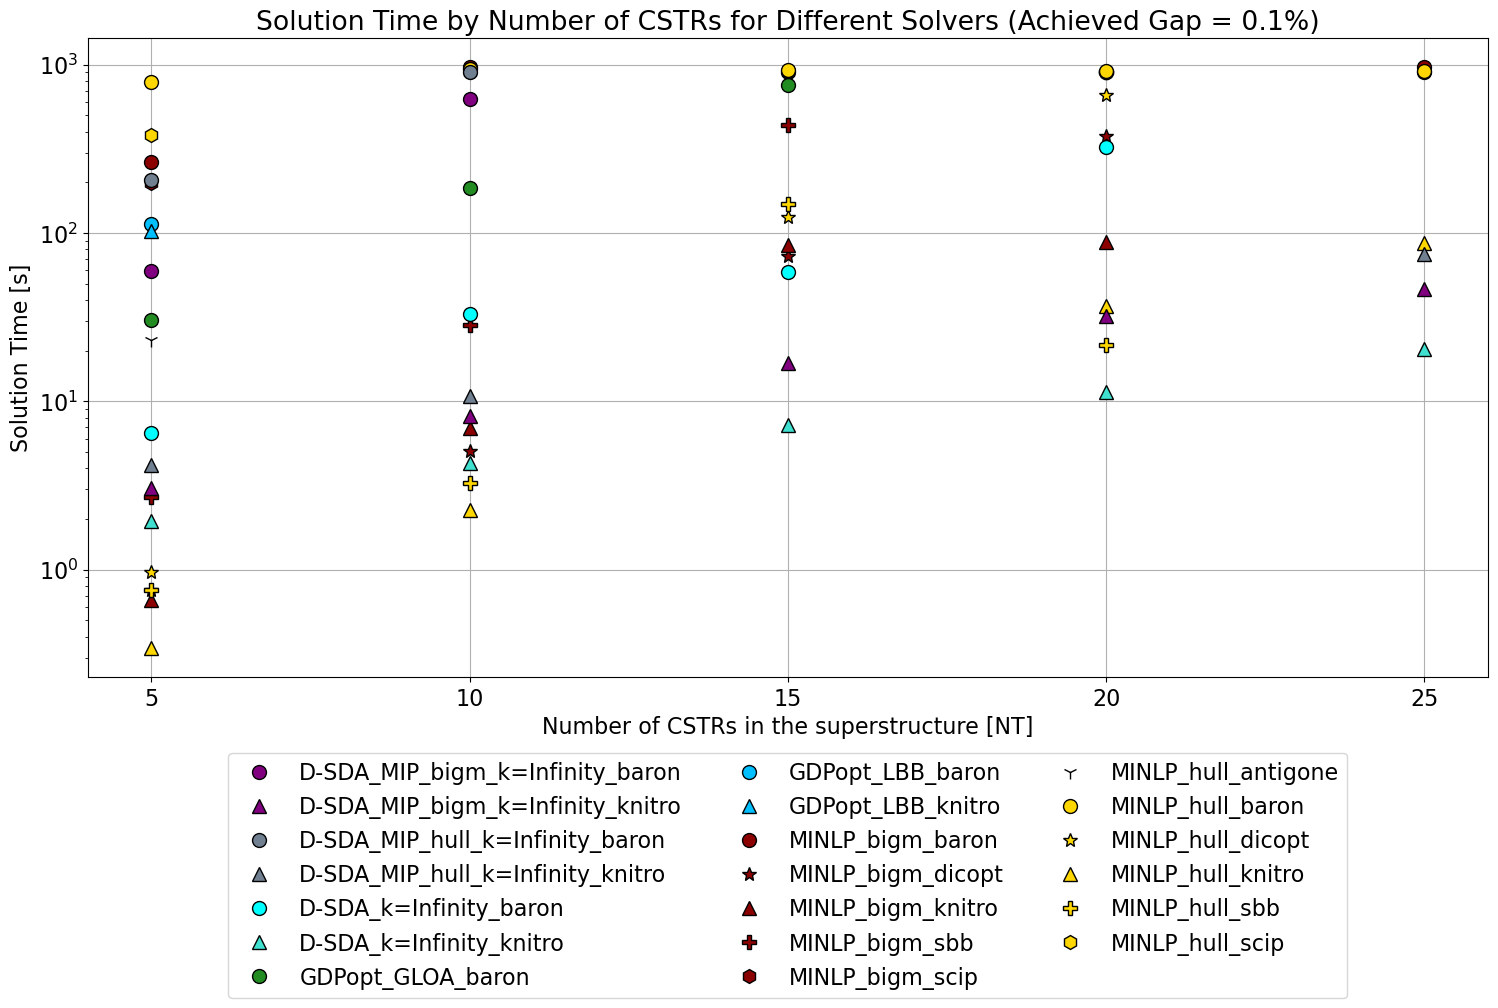

In [36]:
df = pd.read_csv('cstr_results_new.csv')

df = df[df['Solver'] != 'msnlp']

# Drop all the results with number of reactors not in the list selected_NT
selected_NT = [5,10,15,20,25]
df = df[df['NT'].isin(selected_NT)]

# Concatenate Method, Approach, and Solver columns
df['Method_Approach_Solver'] = df['Method'] + '_' + df['Approach'] + '_' + df['Solver']

# Given Objective values (The Global Minimum) for each NT
objective_values = {
    5: 3.061619438,
    6: 3.007105455,
    7: 2.965947971,
    8: 2.934274366,
    9: 2.90933224,
    10: 2.889527488,
    11: 2.873133957,
    12: 2.859462769,
    13: 2.84788282,
    14: 2.837972082,
    15: 2.829389006,
    16: 2.821881525,
    17: 2.815263308,
    18: 2.80938225,
    19: 2.803110782,
    20: 2.799405336,
    21: 2.795131564,
    22: 2.791248965,
    23: 2.787709683,
    24: 2.784459056,
    25: 2.781482273,
    26: 2.77872873310986,
    27: 2.77618015530369,
    28: 2.77381946417497,
    29: 2.77161359423121,
    30: 2.76956223825096
}

# Modify the gap to be 0.1%, 1%, or 10%.
gap = 0.1

# Filter dataframe based on the provided objective values for each NT
df = df[df.apply(lambda row: np.isclose(row['Objective'], objective_values[row['NT']], rtol= gap * 1e-2), axis=1)]

# Plotting setup
fig, ax = plt.subplots(figsize=(20, 8))

# Increase font size
plt.rcParams.update({'font.size': 16})

all_combinations = pd.Series(df['Method_Approach_Solver'].unique())

# Use all combinations
combinations = all_combinations

# Create a dictionary with solvers and their respective markers
solver_markers = {
    'baron': 'o',
    'knitro': '^',
    'sbb': 'P',
    'dicopt': '*',
    'antigone': '1',
    'scip': 'h'
}

# Create a dictionary for method_approach and their respective colors
method_approach_colors = {
    'MINLP_hull': 'gold',                 
    'MINLP_bigm': 'darkred',              
    'GDPopt_LOA': 'blue',                 
    'GDPopt_GLOA': 'forestgreen',         
    'GDPopt_LBB': 'deepskyblue',          
    'D-SDA_MIP_hull': 'slategray',    
    'D-SDA_MIP_hull_k=2': 'slategray',    
    'D-SDA_MIP_hull_k=Infinity_baron': 'lime',  
    'D-SDA_MIP_hull_k=Infinity_knitro': 'lime',  
    'D-SDA_MIP_bigm': 'purple',       
    'D-SDA_MIP_bigm_k=2': 'purple',       
    'D-SDA_MIP_bigm_k=Infinity_baron': 'salmon',  
    'D-SDA_MIP_bigm_k=Infinity_knitro': 'salmon',  
    'D-SDA_k=2': 'firebrick',             
    'D-SDA_k=Infinity': 'turquoise',
    'D-SDA_k=Infinity_knitro': 'turquoise',  
    'D-SDA_k=Infinity_baron': 'cyan',
    'D-SDA_k=2_knitro': 'firebrick',
    'D-SDA_k=2_baron': 'cyan' 
}


# If two rows with same 'Method_Approach_Solver' and 'NT' value, keep the one with the lowest 'Time' value
df = df.sort_values('Time').drop_duplicates(['Method_Approach_Solver', 'NT'])
df = df.sort_values(['Method_Approach_Solver', 'NT'])

for combination in combinations:
    subset = df[(df['Method_Approach_Solver'] == combination) & (df['Status'] != 'infeasible')]
    subset = subset[subset['Objective'] <= subset.groupby('NT')['Objective'].transform('min')*(1 + gap * 1e-2)]
    
    # Extract the method, approach, and solver from the combination
    components = combination.split('_')
    solver = components[-1]
    if components[0] == "D-SDA":
        method_approach = f"{components[0]}_{components[1]}_{components[2]}"
    else:
        method_approach = '_'.join(components[:2])
    
    marker = solver_markers.get(solver, 'o')  # Use 'o' as default if solver not found in dictionary
    # color = method_approach_colors.get(method_approach, 'violet')  # Use 'green' as default if method-approach not found
    color = method_approach_colors[method_approach]  # Use 'green' as default if method-approach not found

    plt.plot(subset['NT'], subset['Time'], label=combination, mec='black', marker=marker, linestyle='', color=color, markersize=10)

plt.xlabel('Number of CSTRs in the superstructure [NT]')
plt.yscale('log')
plt.ylabel('Solution Time [s]')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title(f"Solution Time by Number of CSTRs for Different Solvers (Achieved Gap = {gap}%)")
plt.grid(True)
plt.tight_layout()

# Set x-ticks to only show the selected_NT values
ax.set_xticks(selected_NT)

# Sort the legend labels and handles
handles, labels = ax.get_legend_handles_labels()
sorted_indices = np.argsort(labels)
sorted_handles = [handles[idx] for idx in sorted_indices]
sorted_labels = [labels[idx] for idx in sorted_indices]
ax.legend(sorted_handles, sorted_labels, loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=3)

plt.show()

## Data Visualization of CSTR Optimization Results ran on Dantzig Server

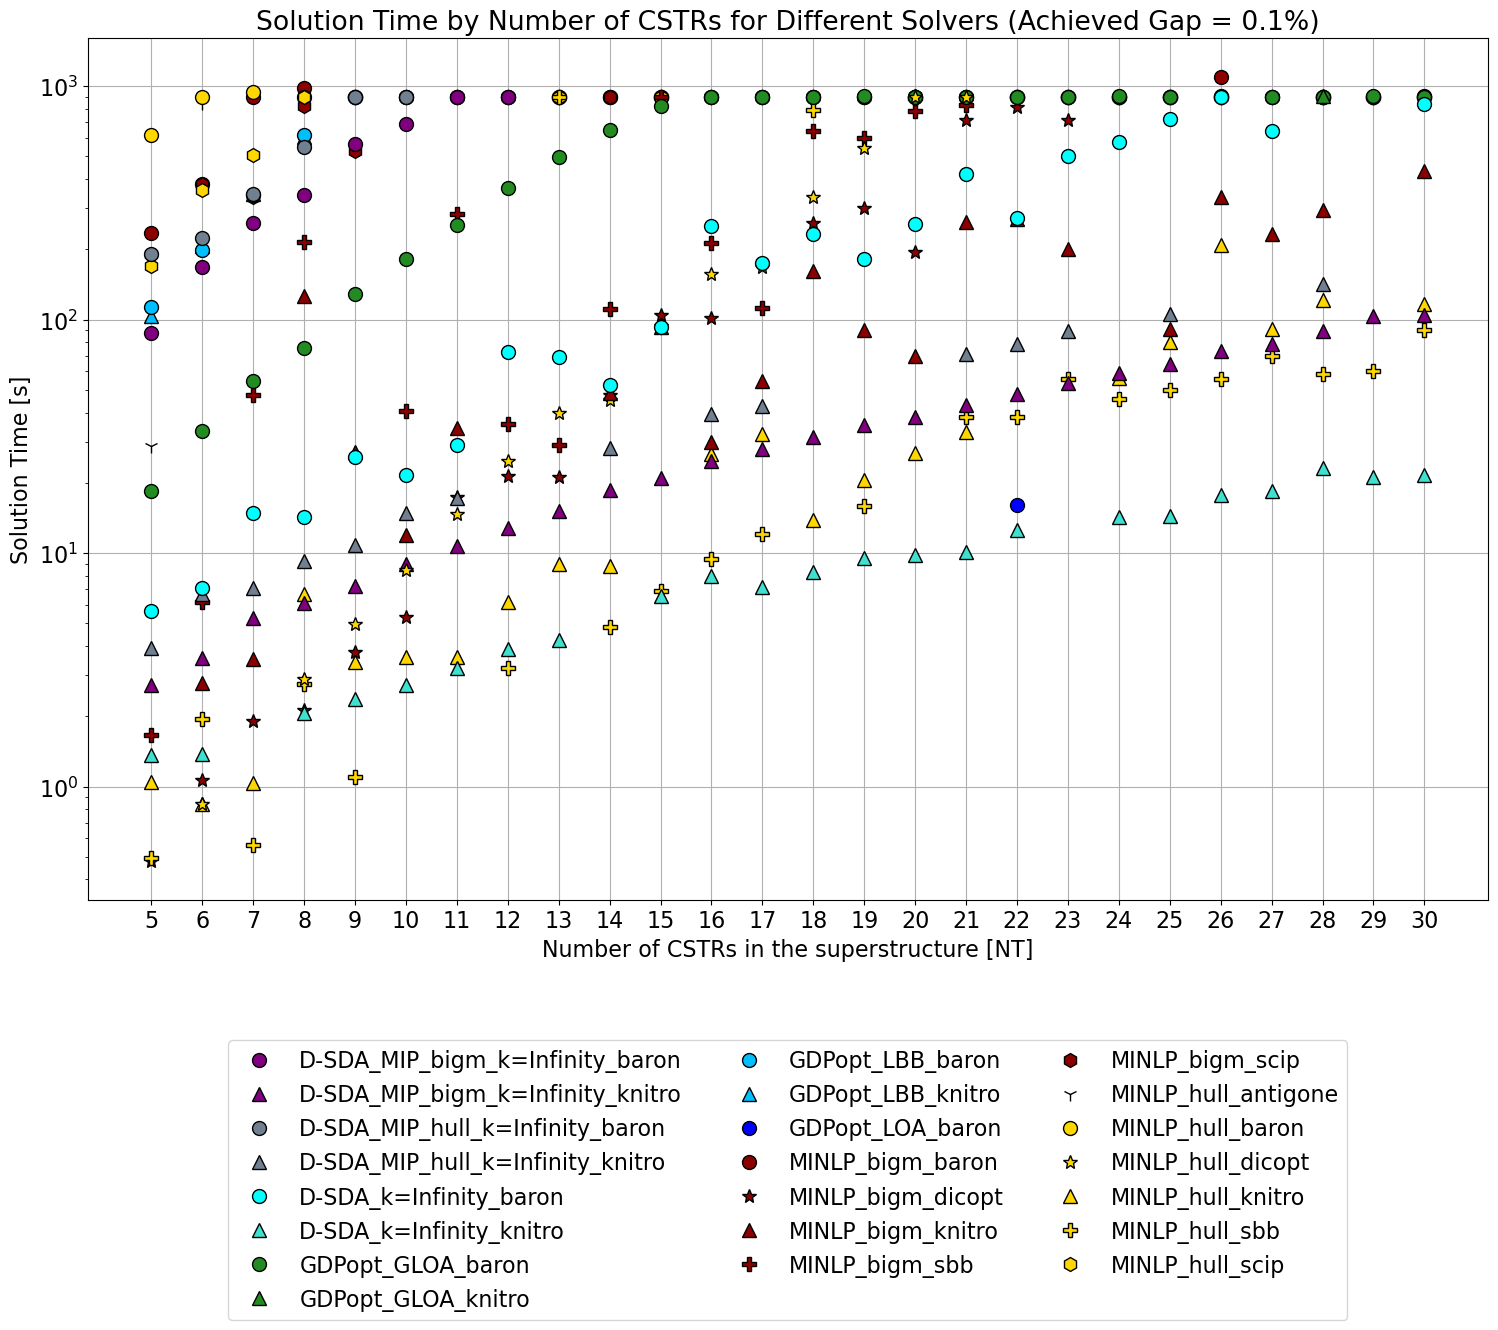

In [37]:
df = pd.read_csv('cstr_results_30_dantzig.csv')

df = df[df['Solver'] != 'msnlp']

# Drop all the results with number of reactors not in the list selected_NT
selected_NT = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
df = df[df['NT'].isin(selected_NT)]

# Concatenate Method, Approach, and Solver columns
df['Method_Approach_Solver'] = df['Method'] + '_' + df['Approach'] + '_' + df['Solver']

# Given Objective values (The Global Minimum) for each NT
objective_values = {
    5: 3.061619438,
    6: 3.007105455,
    7: 2.965947971,
    8: 2.934274366,
    9: 2.90933224,
    10: 2.889527488,
    11: 2.873133957,
    12: 2.859462769,
    13: 2.84788282,
    14: 2.837972082,
    15: 2.829389006,
    16: 2.821881525,
    17: 2.815263308,
    18: 2.80938225,
    19: 2.803110782,
    20: 2.799405336,
    21: 2.795131564,
    22: 2.791248965,
    23: 2.787709683,
    24: 2.784459056,
    25: 2.781482273,
    26: 2.77872873310986,
    27: 2.77618015530369,
    28: 2.77381946417497,
    29: 2.77161359423121,
    30: 2.76956223825096
}

# Modify the gap to be 0.1%, 1%, or 10%.
gap = 0.1

# Filter dataframe based on the provided objective values for each NT
df = df[df.apply(lambda row: np.isclose(row['Objective'], objective_values[row['NT']], rtol= gap * 1e-2), axis=1)]

# Plotting setup
fig, ax = plt.subplots(figsize=(20, 10))

# Increase font size
plt.rcParams.update({'font.size': 16})

all_combinations = pd.Series(df['Method_Approach_Solver'].unique())

# Use all combinations
combinations = all_combinations

# Create a dictionary with solvers and their respective markers
solver_markers = {
    'baron': 'o',
    'knitro': '^',
    'sbb': 'P',
    'dicopt': '*',
    'antigone': '1',
    'scip': 'h'
}

# Create a dictionary for method_approach and their respective colors
method_approach_colors = {
    'MINLP_hull': 'gold',                 
    'MINLP_bigm': 'darkred',              
    'GDPopt_LOA': 'blue',                 
    'GDPopt_GLOA': 'forestgreen',         
    'GDPopt_LBB': 'deepskyblue',          
    'D-SDA_MIP_hull': 'slategray',    
    'D-SDA_MIP_hull_k=2': 'slategray',    
    'D-SDA_MIP_hull_k=Infinity_baron': 'lime',  
    'D-SDA_MIP_hull_k=Infinity_knitro': 'lime',  
    'D-SDA_MIP_bigm': 'purple',       
    'D-SDA_MIP_bigm_k=2': 'purple',       
    'D-SDA_MIP_bigm_k=Infinity_baron': 'salmon',  
    'D-SDA_MIP_bigm_k=Infinity_knitro': 'salmon',  
    'D-SDA_k=2': 'firebrick',             
    'D-SDA_k=Infinity': 'turquoise',
    'D-SDA_k=Infinity_knitro': 'turquoise',  
    'D-SDA_k=Infinity_baron': 'cyan',
    'D-SDA_k=2_knitro': 'firebrick',
    'D-SDA_k=2_baron': 'cyan',
    'Compl_Enum': 'pink',
    'Total_Enum': 'orange'
}


# If two rows with same 'Method_Approach_Solver' and 'NT' value, keep the one with the lowest 'Time' value
df = df.sort_values('Time').drop_duplicates(['Method_Approach_Solver', 'NT'])
df = df.sort_values(['Method_Approach_Solver', 'NT'])

for combination in combinations:
    subset = df[(df['Method_Approach_Solver'] == combination) & (df['Status'] != 'infeasible')]
    subset = subset[subset['Objective'] <= subset.groupby('NT')['Objective'].transform('min')*(1 + gap * 1e-2)]
    
    # Extract the method, approach, and solver from the combination
    components = combination.split('_')
    solver = components[-1]
    if components[0] == "D-SDA":
        method_approach = f"{components[0]}_{components[1]}_{components[2]}"
    else:
        method_approach = '_'.join(components[:2])
    
    marker = solver_markers.get(solver, 'o')  # Use 'o' as default if solver not found in dictionary
    # color = method_approach_colors.get(method_approach, 'violet')  # Use 'green' as default if method-approach not found
    color = method_approach_colors[method_approach]  # Use 'green' as default if method-approach not found

    plt.plot(subset['NT'], subset['Time'], label=combination, mec='black', marker=marker, linestyle='', color=color, markersize=10)

plt.xlabel('Number of CSTRs in the superstructure [NT]')
plt.yscale('log')
plt.ylabel('Solution Time [s]')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title(f"Solution Time by Number of CSTRs for Different Solvers (Achieved Gap = {gap}%)")
plt.grid(True)
plt.tight_layout()

# Set x-ticks to only show the selected_NT values
ax.set_xticks(selected_NT)

# Sort the legend labels and handles
handles, labels = ax.get_legend_handles_labels()
sorted_indices = np.argsort(labels)
sorted_handles = [handles[idx] for idx in sorted_indices]
sorted_labels = [labels[idx] for idx in sorted_indices]
ax.legend(sorted_handles, sorted_labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.show()

1. **Sorting Legend Labels and Handles:** 
- Three separate lists are initialized for the handles (the marker/line instances in the legend) and labels (the text next to each handle) for each method category.
- The code iterates through the combined lists of handles and labels retrieved from the plot's current legend.
- For each label-handle pair, the code checks if the label contains the method category ('GDPopt', 'D-SDA', or 'MINLP').
- Depending on the category, the handle and modified label (with unnecessary parts of the string removed and underscores replaced with spaces) are appended to the corresponding lists.

2. **Creating Custom Legends:**

- Three separate legends are created using the `ax.legend()` method, one for each method category with its corresponding handles and labels.
- Each legend is given a title corresponding to its method category and customized further with font size and column layout.
- The `bbox_to_anchor` and `loc` parameters are used to place each legend at a specific location relative to the plot.
- The legends for 'GDPopt' and 'LD-SDA' are positioned at the bottom center but at different vertical offsets (`bbox_to_anchor`), ensuring they do not overlap.

3. **Adding Legends Back to the Plot:**

- The `ax.add_artist()` method is used to add the 'GDPopt' and 'LD-SDA' legends back to the plot as they were created after the default legend. This is necessary because creating a new legend can remove the previous one.
- The 'MINLP' legend does not require this step because it is the last legend created and will appear on top of the plot by default.

4. **Displaying the Plot:**

- The `plt.show()` command is then called to display the plot with the newly arranged legends.

In [39]:
df = pd.read_csv('cstr_results_30_dantzig_enum.csv')

df = df[df['Solver'] != 'msnlp']

# Drop all the results with number of reactors not in the list selected_NT
selected_NT = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
df = df[df['NT'].isin(selected_NT)]

# Concatenate Method, Approach, and Solver columns
df['Method_Approach_Solver'] = df['Method'] + '_' + df['Approach'] + '_' + df['Solver']

# Given Objective values for each NT
objective_values = {
    5: 3.061619438,
    6: 3.007105455,
    7: 2.965947971,
    8: 2.934274366,
    9: 2.90933224,
    10: 2.889527488,
    11: 2.873133957,
    12: 2.859462769,
    13: 2.84788282,
    14: 2.837972082,
    15: 2.829389006,
    16: 2.821881525,
    17: 2.815263308,
    18: 2.80938225,
    19: 2.803110782,
    20: 2.799405336,
    21: 2.795131564,
    22: 2.791248965,
    23: 2.787709683,
    24: 2.784459056,
    25: 2.781482273,
    26: 2.77872873310986,
    27: 2.77618015530369,
    28: 2.77381946417497,
    29: 2.77161359423121,
    30: 2.76956223825096
}

gap = 0.1

# Filter dataframe based on the provided objective values for each NT
df = df[df.apply(lambda row: np.isclose(row['Objective'], objective_values[row['NT']], rtol= gap * 1e-2), axis=1)]

# Plotting setup
fig, ax = plt.subplots(figsize=(20, 10))

# Increase font size
plt.rcParams.update({'font.size': 16})

all_combinations = pd.Series(df['Method_Approach_Solver'].unique())

# Use all combinations
combinations = all_combinations

# Create a dictionary with solvers and their respective markers
solver_markers = {
    'baron': 'o',
    'knitro': '^',
    'sbb': 'P',
    'dicopt': '*',
    'antigone': '1',
    'scip': 's'
}

# Create a dictionary for method_approach and their respective colors
method_approach_colors = {
    'MINLP_hull': 'gold',                 
    'MINLP_bigm': 'darkred',              
    'GDPopt_LOA': 'blue',                 
    'GDPopt_GLOA': 'forestgreen',         
    'GDPopt_LBB': 'deepskyblue',          
    'D-SDA_MIP_hull': 'slategray',    
    'D-SDA_MIP_hull_k=2': 'slategray',    
    'D-SDA_MIP_hull_k=Infinity_baron': 'lime',  
    'D-SDA_MIP_hull_k=Infinity_knitro': 'lime',  
    'D-SDA_MIP_bigm': 'purple',       
    'D-SDA_MIP_bigm_k=2': 'purple',       
    'D-SDA_MIP_bigm_k=Infinity_baron': 'salmon',  
    'D-SDA_MIP_bigm_k=Infinity_knitro': 'salmon',  
    'D-SDA_k=2': 'firebrick',             
    'D-SDA_k=Infinity': 'turquoise',
    'D-SDA_k=Infinity_knitro': 'turquoise',  
    'D-SDA_k=Infinity_baron': 'cyan',
    'D-SDA_k=2_knitro': 'firebrick',
    'D-SDA_k=2_baron': 'cyan',
    'Compl_Enum': 'pink',
    'Total_Enum': 'orange'
}


# If two rows with same 'Method_Approach_Solver' and 'NT' value, keep the one with the lowest 'Time' value
df = df.sort_values('Time').drop_duplicates(['Method_Approach_Solver', 'NT'])
df = df.sort_values(['Method_Approach_Solver', 'NT'])

for combination in combinations:
    subset = df[(df['Method_Approach_Solver'] == combination) & (df['Status'] != 'infeasible')]
    subset = subset[subset['Objective'] <= subset.groupby('NT')['Objective'].transform('min')*(1 + gap * 1e-2)]
    
    # Extract the method, approach, and solver from the combination
    components = combination.split('_')
    solver = components[-1]
    if components[0] == "D-SDA":
        method_approach = f"{components[0]}_{components[1]}_{components[2]}"
    else:
        method_approach = '_'.join(components[:2])
    
    marker = solver_markers.get(solver, 'o')  # Use 'o' as default if solver not found in dictionary
    # color = method_approach_colors.get(method_approach, 'violet')  # Use 'green' as default if method-approach not found
    color = method_approach_colors[method_approach]  # Use 'green' as default if method-approach not found

    plt.plot(subset['NT'], subset['Time'], label=combination, mec='black', marker=marker, linestyle='', color=color, markersize=12)

plt.xlabel('Number of CSTRs in the superstructure [NT]')
plt.yscale('log')
plt.ylabel('Solution Time [s]')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title(f"Solution Time by Number of CSTRs for Different Solvers (Achieved Gap = {gap}%)")
plt.grid(True)
plt.tight_layout()

# Set x-ticks to only show the selected_NT values
ax.set_xticks(selected_NT)

# Sort the legend labels and handles
GDPopt_handles, GDPopt_labels = [], []
DSDA_handles, DSDA_labels = [], []
MINLP_handles, MINLP_labels = [], []
Enum_handles, Enum_labels = [], []

for handle, label, in zip(*ax.get_legend_handles_labels()):
    if 'GDPopt' in label:
        GDPopt_handles.append(handle)
        GDPopt_labels.append(label.replace('GDPopt_', '').replace('_', ' '))
    elif 'D-SDA' in label:
        DSDA_handles.append(handle)
        DSDA_labels.append(label.replace('D-SDA_', '').replace('_', ' '))
    elif 'MINLP' in label:
        MINLP_handles.append(handle)
        MINLP_labels.append(label.replace('MINLP_', '').replace('_', ' '))

# Create custom legends
legend_GDPopt = ax.legend(GDPopt_handles, GDPopt_labels, title='GDPopt', loc='lower center', bbox_to_anchor=(0.5, -0.49), fontsize='small', ncol=5)
legend_DSDA = ax.legend(DSDA_handles, DSDA_labels, title='LD-SDA', loc='lower center', bbox_to_anchor=(0.5, -0.34), fontsize='small', ncol=3)
legend_MINLP = ax.legend(MINLP_handles, MINLP_labels, title='MINLP', loc='lower center', bbox_to_anchor=(0.5, -0.765, -0.001, 0.5), fontsize='small', ncol=5)

# Add the legends back to the plot
ax.add_artist(legend_GDPopt)
ax.add_artist(legend_DSDA)
# No need to add the last artist, as it will be on top by default

plt.show()

ParserError: Error tokenizing data. C error: Expected 8 fields in line 896, saw 9


Additional filter has been applied to sort out the methods which are 'D-SDA_MIP_hull' and 'D-SDA_MIP_hull' and the solver 'msnlp'.

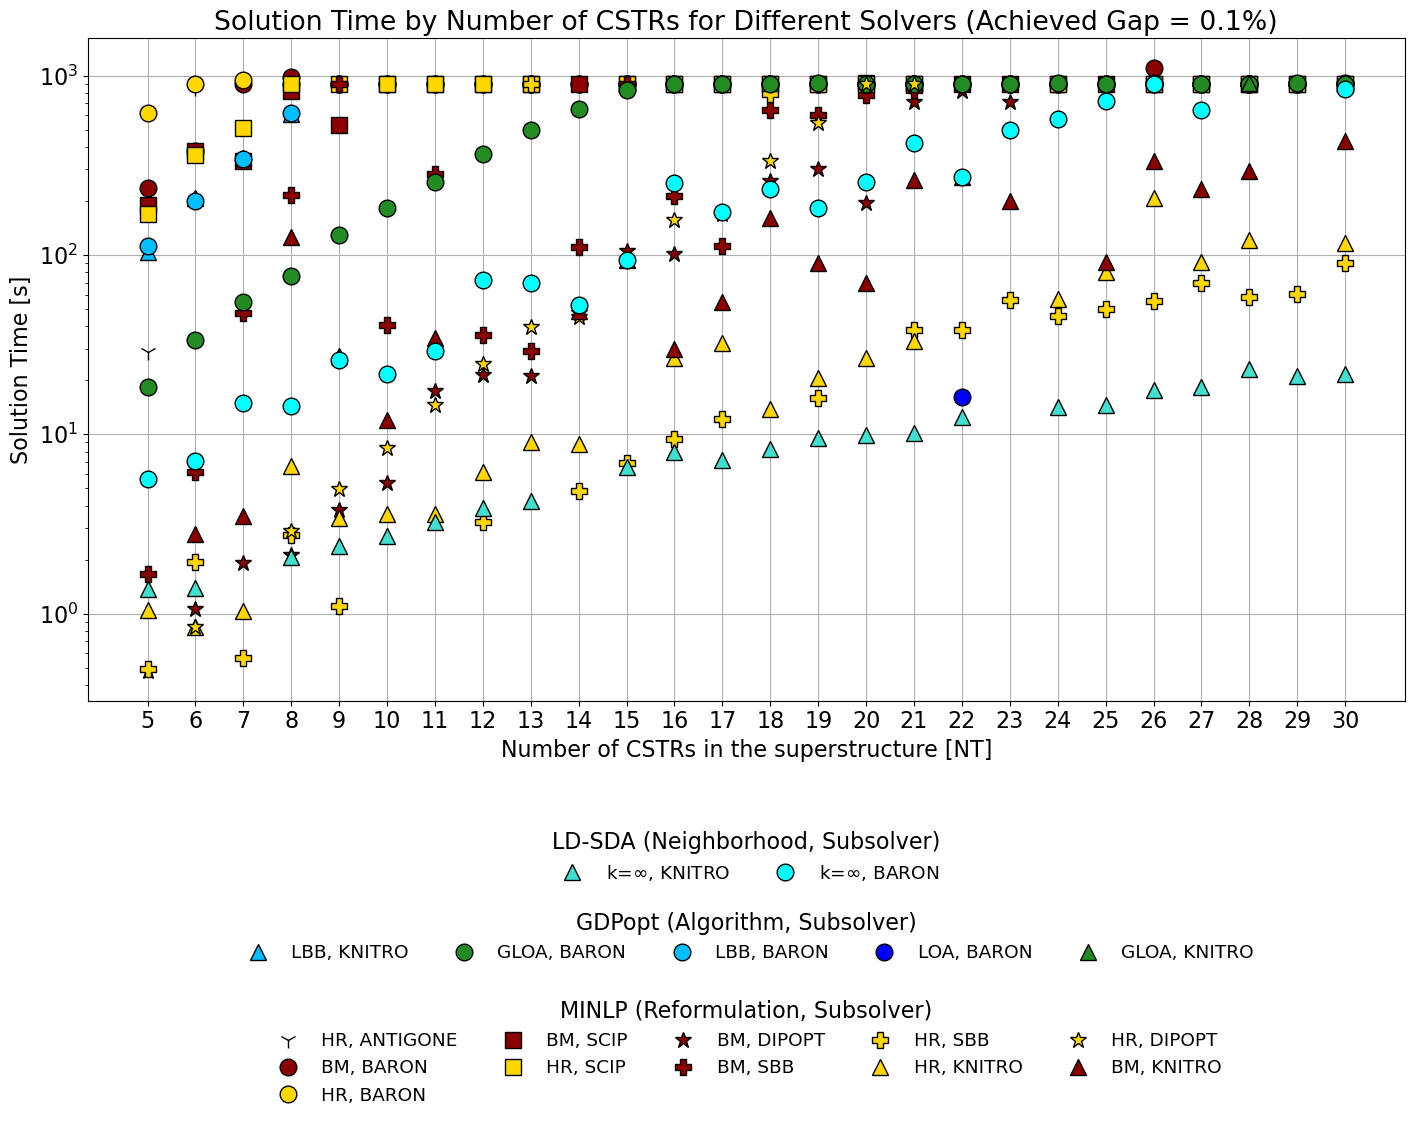

In [152]:
df = pd.read_csv('cstr_results_30_dantzig.csv')

df = df[df['Solver'] != 'msnlp']
df = df[df['Method'] != 'D-SDA_MIP_hull']
df = df[df['Method'] != 'D-SDA_MIP_bigm']
df = df[df['Approach'] != 'Enum']

# Drop all the results with number of reactors not in the list selected_NT
selected_NT = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
df = df[df['NT'].isin(selected_NT)]

# Concatenate Method, Approach, and Solver columns
df['Method_Approach_Solver'] = df['Method'] + '_' + df['Approach'] + '_' + df['Solver']

# Given Objective values for each NT
objective_values = {
    5: 3.061619438,
    6: 3.007105455,
    7: 2.965947971,
    8: 2.934274366,
    9: 2.90933224,
    10: 2.889527488,
    11: 2.873133957,
    12: 2.859462769,
    13: 2.84788282,
    14: 2.837972082,
    15: 2.829389006,
    16: 2.821881525,
    17: 2.815263308,
    18: 2.80938225,
    19: 2.803110782,
    20: 2.799405336,
    21: 2.795131564,
    22: 2.791248965,
    23: 2.787709683,
    24: 2.784459056,
    25: 2.781482273,
    26: 2.77872873310986,
    27: 2.77618015530369,
    28: 2.77381946417497,
    29: 2.77161359423121,
    30: 2.76956223825096
}

gap = 0.1

# Filter dataframe based on the provided objective values for each NT
df = df[df.apply(lambda row: np.isclose(row['Objective'], objective_values[row['NT']], rtol= gap * 1e-2), axis=1)]

# Plotting setup
fig, ax = plt.subplots(figsize=(18, 8))

# Increase font size
plt.rcParams.update({'font.size': 16})

all_combinations = pd.Series(df['Method_Approach_Solver'].unique())

# Use all combinations
combinations = all_combinations

# Create a dictionary with solvers and their respective markers
solver_markers = {
    'baron': 'o',
    'knitro': '^',
    'sbb': 'P',
    'dicopt': '*',
    'antigone': '1',
    'scip': 's'
}

# Create a dictionary for method_approach and their respective colors
method_approach_colors = {
    'MINLP_hull': 'gold',                 
    'MINLP_bigm': 'darkred',              
    'GDPopt_LOA': 'blue',                 
    'GDPopt_GLOA': 'forestgreen',         
    'GDPopt_LBB': 'deepskyblue',          
    'D-SDA_MIP_hull': 'slategray',    
    'D-SDA_MIP_hull_k=2': 'slategray',    
    'D-SDA_MIP_hull_k=Infinity_baron': 'lime',  
    'D-SDA_MIP_hull_k=Infinity_knitro': 'lime',  
    'D-SDA_MIP_bigm': 'purple',       
    'D-SDA_MIP_bigm_k=2': 'purple',       
    'D-SDA_MIP_bigm_k=Infinity_baron': 'salmon',  
    'D-SDA_MIP_bigm_k=Infinity_knitro': 'salmon',  
    'D-SDA_k=2': 'firebrick',             
    'D-SDA_k=Infinity': 'turquoise',
    'D-SDA_k=Infinity_knitro': 'turquoise',  
    'D-SDA_k=Infinity_baron': 'cyan',
    'D-SDA_k=2_knitro': 'firebrick',
    'D-SDA_k=2_baron': 'cyan',
    'Compl_Enum': 'yellow',
    'Total_Enum': 'orange'
}


# If two rows with same 'Method_Approach_Solver' and 'NT' value, keep the one with the lowest 'Time' value
df = df.sort_values('Time').drop_duplicates(['Method_Approach_Solver', 'NT'])
df = df.sort_values(['Method_Approach_Solver', 'NT'])

for combination in combinations:
    subset = df[(df['Method_Approach_Solver'] == combination) & (df['Status'] != 'infeasible')]
    subset = subset[subset['Objective'] <= subset.groupby('NT')['Objective'].transform('min')*(1 + gap * 1e-2)]
    
    # Extract the method, approach, and solver from the combination
    components = combination.split('_')
    solver = components[-1]
    if components[0] == "D-SDA":
        method_approach = f"{components[0]}_{components[1]}_{components[2]}"
    else:
        method_approach = '_'.join(components[:2])
    
    marker = solver_markers.get(solver, 'o')  # Use 'o' as default if solver not found in dictionary
    # color = method_approach_colors.get(method_approach, 'violet')  # Use 'green' as default if method-approach not found
    color = method_approach_colors[method_approach]  # Use 'green' as default if method-approach not found

    plt.plot(subset['NT'], subset['Time'], label=combination, mec='black', marker=marker, linestyle='', color=color, markersize=12)

plt.xlabel('Number of CSTRs in the superstructure [NT]')
plt.yscale('log')
plt.ylabel('Solution Time [s]')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title(f"Solution Time by Number of CSTRs for Different Solvers (Achieved Gap = {gap}%)")
plt.grid(True)
plt.tight_layout()

# Set x-ticks to only show the selected_NT values
ax.set_xticks(selected_NT)

# Sort the legend labels and handles
GDPopt_handles, GDPopt_labels = [], []
DSDA_handles, DSDA_labels = [], []
MINLP_handles, MINLP_labels = [], []

for handle, label, in zip(*ax.get_legend_handles_labels()):
    if 'GDPopt' in label:
        GDPopt_handles.append(handle)
        GDPopt_labels.append(label.replace('GDPopt_', '').replace('_', ', ').replace('knitro','KNITRO').replace('baron','BARON'))
    elif 'D-SDA' in label:
        DSDA_handles.append(handle)
        DSDA_labels.append(label.replace('D-SDA_', '').replace('_', ', ').replace('Infinity', '$\infty$').replace('knitro','KNITRO').replace('baron','BARON'))
    elif 'MINLP' in label:
        MINLP_handles.append(handle)
        MINLP_labels.append(label.replace('MINLP_', '').replace('_', ', ').replace('knitro','KNITRO').replace('baron','BARON').replace('sbb','SBB').replace('dicopt','DIPOPT').replace('antigone','ANTIGONE').replace('scip','SCIP').replace('hull','HR').replace('bigm','BM'))

# Create custom legends
legend_GDPopt = ax.legend(GDPopt_handles, GDPopt_labels, title='GDPopt (Algorithm, Subsolver)', loc='lower center', bbox_to_anchor=(0.5, -0.42), fontsize='small', ncol=5, frameon=False)
legend_DSDA = ax.legend(DSDA_handles, DSDA_labels, title='LD-SDA (Neighborhood, Subsolver)', loc='lower center', bbox_to_anchor=(0.5, -0.30), fontsize='small', ncol=3, frameon=False)
legend_MINLP = ax.legend(MINLP_handles, MINLP_labels, title='MINLP (Reformulation, Subsolver)', loc='lower center', bbox_to_anchor=(0.5, -0.635, -0.001, 0.5), fontsize='small', ncol=5, frameon=False)

# Add the legends back to the plot
ax.add_artist(legend_GDPopt)
ax.add_artist(legend_DSDA)
# No need to add the last artist, as it will be on top by default

plt.show()

To compare the performance between the LD-SDA method, MINLP reformulation method and the GDP algorithm method has been removed.

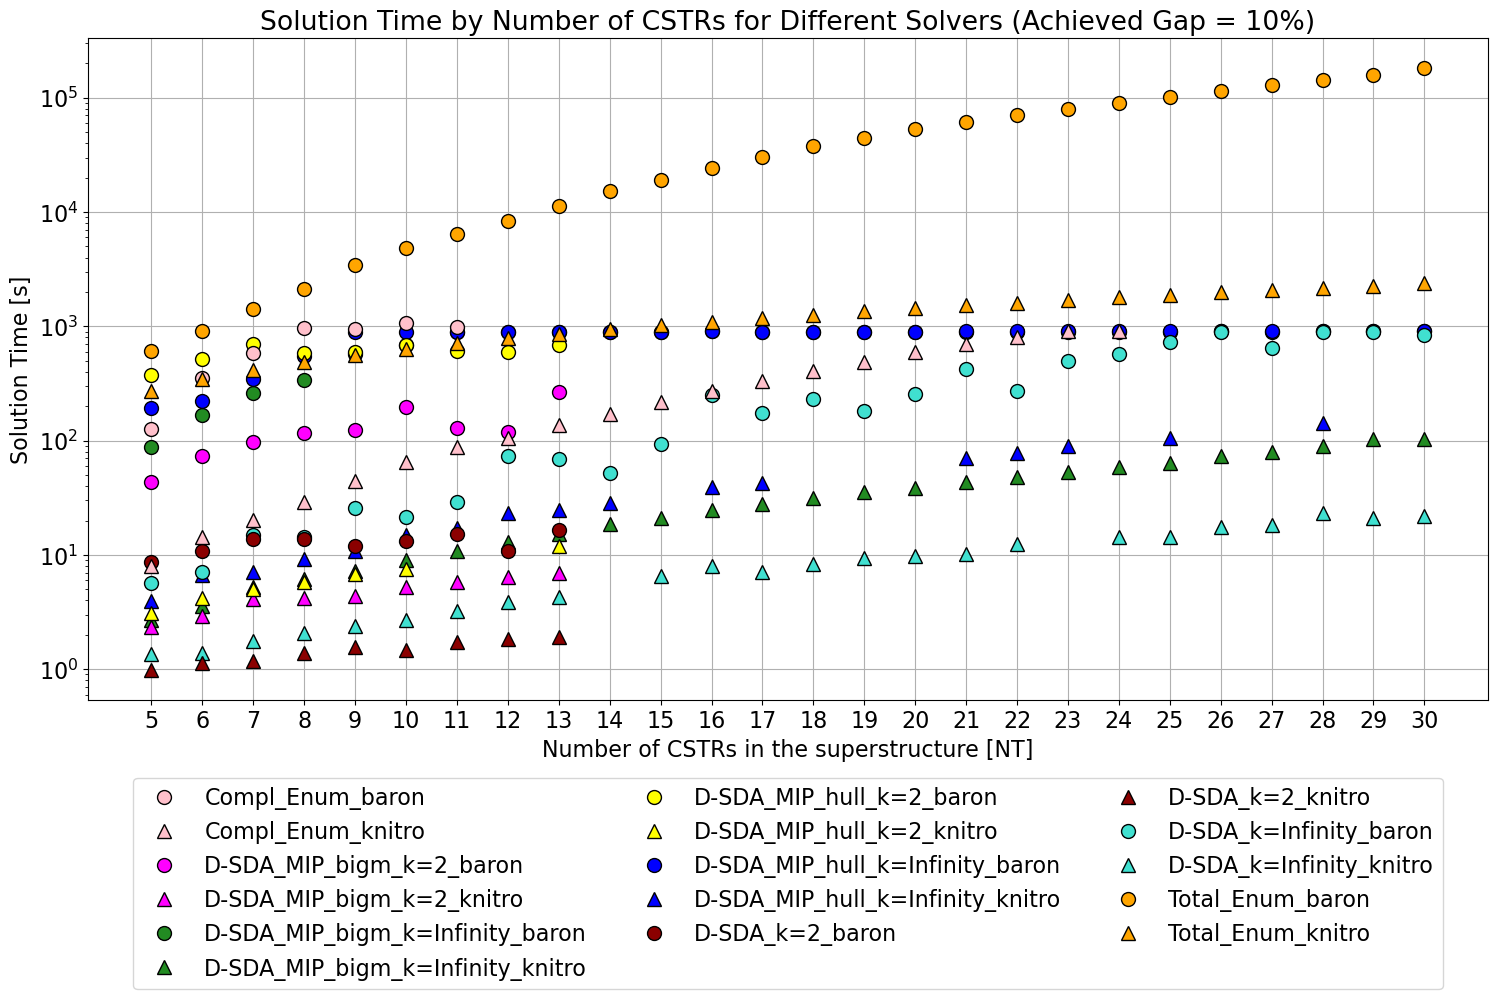

In [4]:
df = pd.read_csv('cstr_results_30_dantzig_enum.csv')

df = df[df['Solver'] != 'msnlp']
df = df[df['Method'] != 'MINLP']
df = df[df['Method'] != 'GDPopt']

# Drop all the results with number of reactors not in the list selected_NT
selected_NT = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
df = df[df['NT'].isin(selected_NT)]

# Concatenate Method, Approach, and Solver columns
df['Method_Approach_Solver'] = df['Method'] + '_' + df['Approach'] + '_' + df['Solver']

# Given Objective values for each NT
objective_values = {
    5: 3.06187318936553,
    6: 3.00722148433392,
    7: 2.96600389571629,
    8: 2.93434904000171,
    9: 2.90952178215271,
    10: 2.889535989,
    11: 2.8731400127081,
    12: 2.859464777,
    13: 2.84789228,
    14: 2.837976548,
    15: 2.829388538,
    16: 2.821878752,
    17: 2.815266536,
    18: 2.809386512,
    19: 2.804129976,
    20: 2.799406275,
    21: 2.795133113,
    22: 2.791251501,
    23: 2.78770976,
    24: 2.784458438,
    25: 2.781481199,
    26: 2.77873048554305,
    27: 2.77618394587567,
    28: 2.77382068888228,
    29: 2.77162138708963,
    30: 2.76956694967023
}

gap = 10

# Filter dataframe based on the provided objective values for each NT
df = df[df.apply(lambda row: np.isclose(row['Objective'], objective_values[row['NT']], rtol= gap * 1e-2), axis=1)]

# Plotting setup
fig, ax = plt.subplots(figsize=(20, 8))

# Increase font size
plt.rcParams.update({'font.size': 16})

all_combinations = pd.Series(df['Method_Approach_Solver'].unique())

# Use all combinations
combinations = all_combinations

# Create a dictionary with solvers and their respective markers
solver_markers = {
    'baron': 'o',
    'knitro': '^',
    'sbb': 'P',
    'dicopt': '*',
    'antigone': '1',
    'scip': 'h'
}

# Create a dictionary for method_approach and their respective colors
method_approach_colors = {
    'D-SDA_MIP_hull_k=2_baron': 'darkorange',
    'D-SDA_MIP_hull_k=2_knitro': 'chocolate',
    'D-SDA_MIP_hull_k=Infinity_baron': 'limegreen',
    'D-SDA_MIP_hull_k=Infinity_knitro': 'darkviolet',
    'D-SDA_MIP_bigm_k=2_baron': 'lightblue',
    'D-SDA_MIP_bigm_k=2_knitro': 'mediumblue',
    'D-SDA_MIP_bigm_k=Infinity_baron': 'salmon',
    'D-SDA_MIP_bigm_k=Infinity_knitro': 'olive',
    'D-SDA_k=2_baron': 'firebrick',
    'D-SDA_k=2_knitro': 'sienna',
    'D-SDA_k=Infinity_baron': 'cyan',
    'D-SDA_k=Infinity_knitro': 'goldenrod',
    'D-SDA_MIP_bigm_k=Infinity': 'forestgreen', 
    'D-SDA_MIP_bigm_k=2': 'magenta',
    'D-SDA_MIP_hull_k=Infinity': 'blue',
    'D-SDA_MIP_hull_k=2': 'yellow',
    'D-SDA_k=Infinity': 'turquoise',
    'D-SDA_k=2': 'darkred',
    'Compl_Enum': 'pink',
    'Total_Enum': 'orange'
}



# If two rows with same 'Method_Approach_Solver' and 'NT' value, keep the one with the lowest 'Time' value
df = df.sort_values('Time').drop_duplicates(['Method_Approach_Solver', 'NT'])
df = df.sort_values(['Method_Approach_Solver', 'NT'])

for combination in combinations:
    subset = df[(df['Method_Approach_Solver'] == combination) & (df['Status'] != 'infeasible')]
    subset = subset[subset['Objective'] <= subset.groupby('NT')['Objective'].transform('min')*(1 + gap * 1e-2)]
    
    # Extract the method, approach, and solver from the combination
    components = combination.split('_')
    solver = components[-1]
    if components[0] == "D-SDA" and components[1] == "MIP":
        method_approach = f"{components[0]}_{components[1]}_{components[2]}_{components[3]}"
    else:
        method_approach = '_'.join(components[:2])
    
    marker = solver_markers.get(solver, 'o')  # Use 'o' as default if solver not found in dictionary
    color = method_approach_colors.get(method_approach, 'violet')  # Use 'green' as default if method-approach not found
    # color = method_approach_colors[method_approach]  # Use 'green' as default if method-approach not found

    plt.plot(subset['NT'], subset['Time'], label=combination, mec='black', marker=marker, linestyle='', color=color, markersize=10)

plt.xlabel('Number of CSTRs in the superstructure [NT]')
plt.yscale('log')
plt.ylabel('Solution Time [s]')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.title(f"Solution Time by Number of CSTRs for Different Solvers (Achieved Gap = {gap}%)")
plt.grid(True)
plt.tight_layout()

# Set x-ticks to only show the selected_NT values
ax.set_xticks(selected_NT)

# Sort the legend labels and handles
handles, labels = ax.get_legend_handles_labels()
sorted_indices = np.argsort(labels)
sorted_handles = [handles[idx] for idx in sorted_indices]
sorted_labels = [labels[idx] for idx in sorted_indices]
ax.legend(sorted_handles, sorted_labels, loc='upper center', bbox_to_anchor=(0.5, -0.10), ncol=3)
# ax.set_ylim(0.7, 1060)  # Assuming global_max_time has been calculated as the maximum 'Time' value

plt.show()

To compare the Achievement Gap between 0.1% and 10%, the gap has become a list of 0.1% and 10% and the code has been modified to plot the graph for both the gaps.

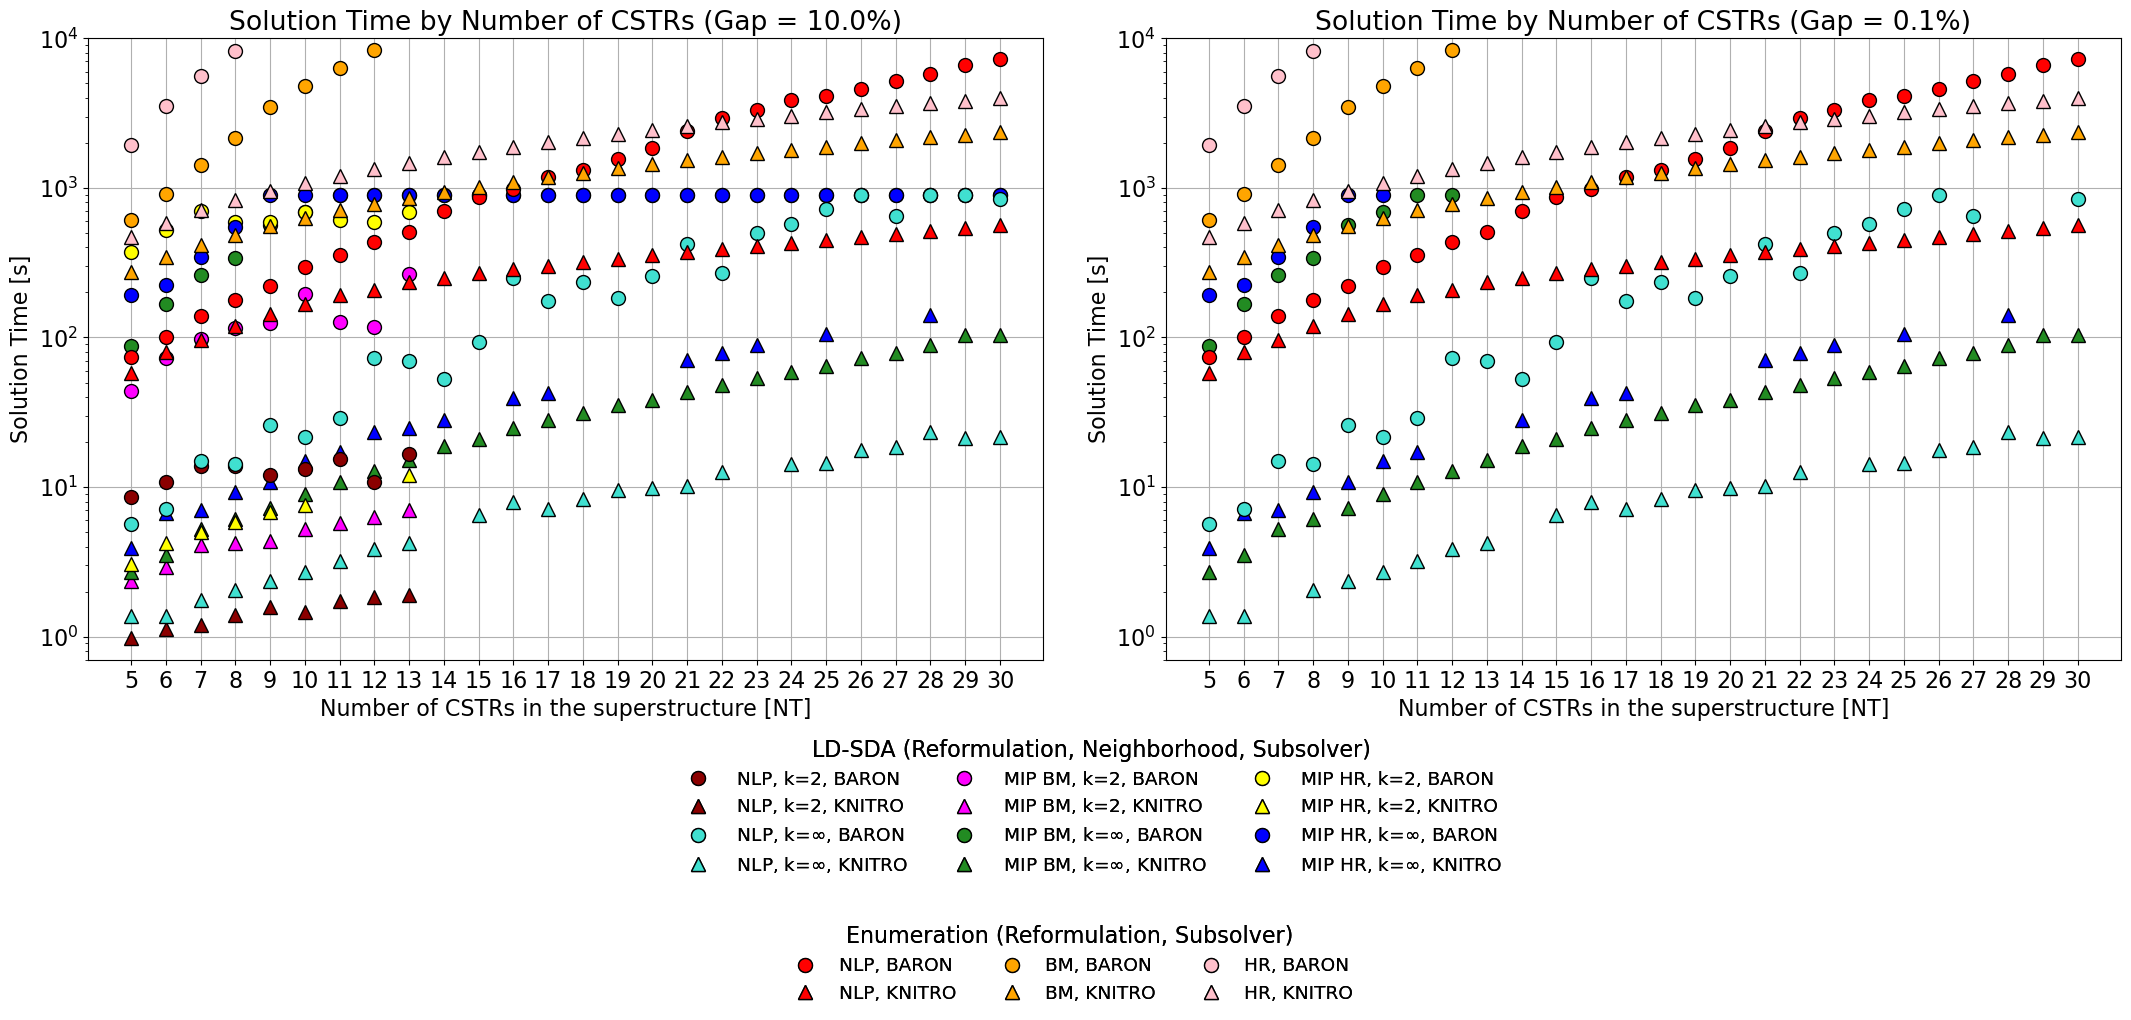

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('cstr_results_30_dantzig_enum.csv')
df = df[df['Solver'] != 'msnlp']
df = df[df['Method'] != 'MINLP']
df = df[df['Method'] != 'GDPopt']
df = df[df['Method'] != 'Compl']

# Drop all the results with number of reactors not in the list selected_NT
selected_NT = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
df = df[df['NT'].isin(selected_NT)]

# Concatenate Method, Approach, and Solver columns
df['Method_Approach_Solver'] = df['Method'] + '_' + df['Approach'] + '_' + df['Solver']

# Given Objective values for each NT
objective_values = {
    5: 3.06187318936553,
    6: 3.00722148433392,
    7: 2.96600389571629,
    8: 2.93434904000171,
    9: 2.90952178215271,
    10: 2.889535989,
    11: 2.8731400127081,
    12: 2.859464777,
    13: 2.84789228,
    14: 2.837976548,
    15: 2.829388538,
    16: 2.821878752,
    17: 2.815266536,
    18: 2.809386512,
    19: 2.804129976,
    20: 2.799406275,
    21: 2.795133113,
    22: 2.791251501,
    23: 2.78770976,
    24: 2.784458438,
    25: 2.781481199,
    26: 2.77873048554305,
    27: 2.77618394587567,
    28: 2.77382068888228,
    29: 2.77162138708963,
    30: 2.76956694967023
}

# Define the gaps for the subplots
gaps = [0.10, 0.0010]  # 10% and 0.1% gaps

# Create the subplots
fig, axs = plt.subplots(1, 2, figsize=(22, 8), gridspec_kw={'width_ratios': [1, 1]})

# Increase font size
plt.rcParams.update({'font.size': 16})

all_combinations = pd.Series(df['Method_Approach_Solver'].unique())

# Use all combinations
combinations = all_combinations

# Create a dictionary with solvers and their respective markers
solver_markers = {
    'baron': 'o',
    'knitro': '^',
    'sbb': 'P',
    'dicopt': '*',
    'antigone': '1',
    'scip': 'h'
}

# Create a dictionary for method_approach and their respective colors
method_approach_colors = {
    'D-SDA_MIP_hull_k=2_baron': 'darkorange',
    'D-SDA_MIP_hull_k=2_knitro': 'chocolate',
    'D-SDA_MIP_hull_k=Infinity_baron': 'limegreen',
    'D-SDA_MIP_hull_k=Infinity_knitro': 'darkviolet',
    'D-SDA_MIP_bigm_k=2_baron': 'lightblue',
    'D-SDA_MIP_bigm_k=2_knitro': 'mediumblue',
    'D-SDA_MIP_bigm_k=Infinity_baron': 'salmon',
    'D-SDA_MIP_bigm_k=Infinity_knitro': 'olive',
    'D-SDA_k=2_baron': 'firebrick',
    'D-SDA_k=2_knitro': 'sienna',
    'D-SDA_k=Infinity_baron': 'cyan',
    'D-SDA_k=Infinity_knitro': 'goldenrod',
    'D-SDA_MIP_bigm_k=Infinity': 'forestgreen', 
    'D-SDA_MIP_bigm_k=2': 'magenta',
    'D-SDA_MIP_hull_k=Infinity': 'blue',
    'D-SDA_MIP_hull_k=2': 'yellow',
    'D-SDA_k=Infinity': 'turquoise',
    'D-SDA_k=2': 'darkred',
    'Compl_Enum': 'pink',
    'Enum_bigm': 'orange',
    'Enum_hull': 'pink',
    'Enum_AMIPF': 'red',
}

# If two rows with same 'Method_Approach_Solver' and 'NT' value, keep the one with the lowest 'Time' value
df = df.sort_values('Time').drop_duplicates(['Method_Approach_Solver', 'NT'])
df = df.sort_values(['Method_Approach_Solver', 'NT'])

# Loop through each gap and create corresponding plots
legend_handles = []
legend_labels = []
for i, gap in enumerate(gaps):
    # Filter data based on gap
    df_filtered = df.copy()
    df_filtered['Within_Gap'] = df_filtered.apply(lambda row: np.isclose(row['Objective'],
                                                                         objective_values[row['NT']],
                                                                         rtol=gap), axis=1)
    df_filtered = df_filtered[df_filtered['Within_Gap']]

    # Plot data
    for combination in df_filtered['Method_Approach_Solver'].unique():
        subset = df_filtered[df_filtered['Method_Approach_Solver'] == combination]
        
        # Extract the method, approach, and solver from the combination
        components = combination.split('_')
        method_approach = '_'.join(components[:-1])  # Combine all but the last component for the method_approach key
        solver = components[-1]
        
        marker = solver_markers.get(solver, 'o')
        color = method_approach_colors.get(method_approach, 'grey')  # Default color if not found
        
        axs[i].plot(subset['NT'], subset['Time'], label=combination.replace('_', ', '), mec='black', 
                    marker=marker, linestyle='', color=color, markersize=10)

    axs[i].set_xlabel('Number of CSTRs in the superstructure [NT]')
    axs[i].set_yscale('log')
    axs[i].set_ylabel('Solution Time [s]')
    axs[i].set_title(f'Solution Time by Number of CSTRs (Gap = {gap*100}%)')
    axs[i].grid(True)
    axs[i].set_xticks(selected_NT)

    # Collect handles and labels from each subplot
    handles, labels = axs[i].get_legend_handles_labels()
    legend_handles.extend(handles)
    legend_labels.extend(labels)

# Adjust the layout
plt.tight_layout(pad=2.0)

# Remove duplicate labels and handles
unique_legend = dict(zip(legend_labels, legend_handles))
sorted_labels = sorted(unique_legend.keys(), key=lambda x: x.lower())
sorted_handles = [unique_legend[label] for label in sorted_labels]

# Replace Compl into Complete and Enum into Enumeration
sorted_labels = [label.replace('Enum,', 'Enumeration').replace('D-SDA, k', 'D-SDA, NLP, k').replace('D-SDA', 'LD-SDA').replace('Infinity', '$\infty$').replace('AMIPF', 'NLP').replace('baron','BARON').replace('knitro','KNITRO') for label in sorted_labels]

# Create two separate lists for LD-SDA and Enumeration legend entries
ld_sda_entries = [(handle, label) for handle, label in zip(sorted_handles, sorted_labels) if 'LD-SDA' in label]
enum_entries = [(handle, label) for handle, label in zip(sorted_handles, sorted_labels) if 'Enumeration' in label]

# Create LD-SDA legend
ld_sda_labels = [label.replace('LD-SDA,', '').replace('MIP,', 'MIP').replace('bigm', 'BM').replace('hull', 'HR') for handle, label in ld_sda_entries]
ld_sda_handles = [handle for handle, label in ld_sda_entries]
ld_sda_legend = axs[0].legend(ld_sda_handles, ld_sda_labels, loc='upper center', bbox_to_anchor=(1.05, -0.1), title="LD-SDA (Reformulation, Neighborhood, Subsolver)", frameon=False, ncol=3, fontsize='small')

# Create Enumeration legend
enum_labels = [label.replace('Enumeration ', '').replace('bigm', 'BM').replace('hull', 'HR') for handle, label in enum_entries]
enum_handles = [handle for handle, label in enum_entries]
enum_legend = axs[1].legend(enum_handles, enum_labels, loc='upper center', bbox_to_anchor=(-0.1, -0.4), title="Enumeration (Reformulation, Subsolver)", frameon=False, ncol=3, fontsize='small')

# Add legends back to the axes
axs[0].add_artist(ld_sda_legend)
axs[1].add_artist(enum_legend)

# # Create a single legend for the figure with the sorted handles and labels
# fig.legend(sorted_handles, sorted_labels, loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=3)

# Set the y-axis limits for both subplots to start at 10^-1
for ax in axs:
    ax.set_ylim(0.7, 10000)  # Assuming global_max_time has been calculated as the maximum 'Time' value

plt.show()
